In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 목차
## 1. 데이터 확인
### 1.1 train_df, test_df, 데이터 변환
### 1.2 데이터 병합
### 1.3 결측치 확인
## 2. 데이터 시각화
### 2.1 power consumtion 분포
### 2.2 소비 전력 평균 분포 시각화
### 2.3 building type별 데이터 소비 전력 평균 분포 시각화


# 1. 데이터

In [7]:
train_df = pd.read_csv('./train.csv')
building_info = pd.read_csv('./building_info.csv')
test_df = pd.read_csv('./test.csv')

## 1.1 train_df, test_df, 데이터 변환
### train_df와 test df를 보니 train_df에만 일조량과 일사량이 존재하는 것이 보입니다.

In [8]:
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [9]:
import dataframe_image as dfi
dfi.export(train_df.head(), 'train_df_head.png')

In [173]:
test_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


### 혹시 모를 에러를 위해서 한글에서 영어로 변환해줍니다. 또한 numdate_time은 건물번호와 일시를 합쳐놓은 것 같으니 drop해줍니다.

In [174]:
train_df = train_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train_df.drop('num_date_time', axis = 1, inplace=True)

In [175]:
test_df = test_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test_df.drop('num_date_time', axis = 1, inplace=True)

In [176]:
train_df.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


### 마찬가지로 building info 또한 영어로 바꿔줍니다.

In [177]:
building_info = building_info.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})

In [178]:
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}

building_info['building_type'] = building_info['building_type'].replace(translation_dict)
#building_info.drop('Unnamed: 0', axis = 1 , inplace=True)

In [179]:
building_info.head()

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


## 1.2 csv 파일 병합

### 데이터 분석을 위해서 두 csv파일을 합쳐줍니다.

In [180]:
train_df = pd.merge(train_df, building_info, on='building_number', how='left')
test_df = pd.merge(test_df, building_info, on='building_number', how='left')

## 1.3 결측치 확인

### 결측치를 확인해줍시다. train_df에는 많은 양의 결측치를 보여주는 반면, test_df는 결측치가 보이지 않습니다. 또한 solar_power_capcity, ess, pcs에는 -로 결측치가 되어 있습니다. 또한 대부분이 결측치로 보이네요. (불필요해보이니 drop해줍시다.)

In [181]:
len(train_df)

204000

In [182]:
train_df.isna().sum()

building_number              0
date_time                    0
temperature                  0
rainfall                160069
windspeed                   19
humidity                     9
sunshine                 75182
solar_radiation          87913
power_consumption            0
building_type                0
total_area                   0
cooling_area                 0
solar_power_capacity         0
ess_capacity                 0
pcs_capacity                 0
dtype: int64

In [183]:
test_df.isna().sum()

building_number         0
date_time               0
temperature             0
rainfall                0
windspeed               0
humidity                0
building_type           0
total_area              0
cooling_area            0
solar_power_capacity    0
ess_capacity            0
pcs_capacity            0
dtype: int64

In [184]:
print(len(train_df[train_df['solar_power_capacity'] == '-']))
print(len(train_df[train_df['ess_capacity'] == '-']))
print(len(train_df[train_df['pcs_capacity'] == '-']))

130560
193800
193800


In [185]:
train_df = train_df.drop(['solar_power_capacity', 'ess_capacity', 'pcs_capacity'], axis=1)
test_df = test_df.drop(['solar_power_capacity', 'ess_capacity', 'pcs_capacity'], axis=1)

### datetime을 년도, 월, 주, 시간으로 쪼개줍시다.

In [186]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y%m%d %H')

# date time feature 생성
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year

# one hot encoding 생성
# train_df = pd.get_dummies(train_df, columns=['building_type'], drop_first=True)

In [187]:
#train_df = pd.get_dummies(train_df, columns=['building_type'], drop_first=True)

# 데이터 시각화
## 2.1 power consumtion 분포

- 데이터가 왼쪽으로 치우쳐 있네요

C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


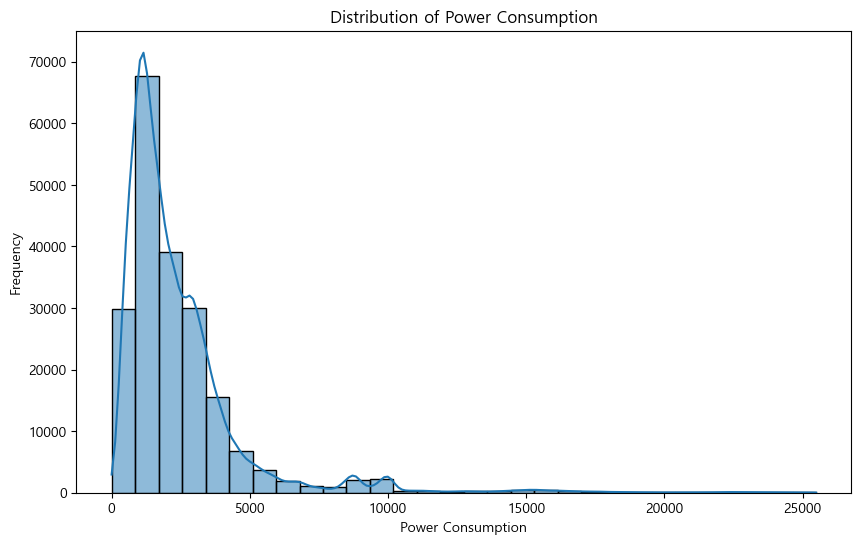

In [188]:
# histogram 생성
plt.figure(figsize=(10, 6))
sns.histplot(train_df['power_consumption'], bins=30, kde=True)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

## 2.2 소비 전력 평균 분포 시각화

- 낮 시간대에는 전력소모량이 증가하고 밤 시간대에는 전력이 증가하네요. 사람들이 일하는 시간에는 증가하는 것을 보입니다.
- 전체적으로 8월에 가까워질수록 전력 사용량이 증가하는 모습을 보이네요. 아마도 더워질수록 에어컨을 더 많이 키니 그렇겠죠?
- 또한 day of the year을 보면 중간중간 훅하고 떨어지는 모습을 볼 수 있습니다. 주말에는 일을 하지 않으니 떨어지는 모습을 보이네요.



In [189]:
# 연중 일별 평균 소비전력
# (매년1월1일부터 152일째 = 6월 1일)부터
# (매년1월1일부터 236일째 = 8월 24일)까지
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear
mean_power_by_day_of_year = train_df.groupby('day_of_year')['power_consumption'].mean()
#print("[연중 일별 평균 소비전력]\n", mean_power_by_day_of_year)

# 연중 시간별 평균 소비전력
# (매년1월1일00시부터 3624시간째 = 6월 1일00시)부터
# (매년1월1일00시부터 5663시간째 = 8월 24일23)까지
train_df['hour_of_year'] = train_df['date_time'].dt.hour + (train_df['date_time'].dt.dayofyear - 1) * 24
mean_power_by_hour_of_year = train_df.groupby('hour_of_year')['power_consumption'].mean()
#print("연중 시간별 평균 소비전력 : ", mean_power_by_hour_of_year)

# 월별 평균 소비전력
# 6월 평균, 7월 평균, 8월 평균
mean_power_by_month = train_df.groupby('month')['power_consumption'].mean()
#print("년 기준 월 평균 소비전력 : ", mean_power_by_month)

# 시간당 평균 소비전력
# 6~8월 동안 같은 시간별 평균
mean_power_by_hour = train_df.groupby('hour')['power_consumption'].mean()
#print("일 기준 시간 평균 소비전력 : ", mean_power_by_hour)

# 일별 평균 소비전력
# 6~8월 동안 같은날 평균
mean_power_by_day = train_df.groupby('day')['power_consumption'].mean()
#print("월 기준 시간 평균 소비전력 : ", mean_power_by_month)

In [190]:
print("[연중 일별 평균 소비전력]\n", mean_power_by_day_of_year.head()) # 1월1일부터 152일쨰 (6월 1일)
print("[연중 시간별 평균 소비전력]\n", mean_power_by_hour_of_year.head()) # 1월1일부터 3624시간째 (6월 1일)
print("[월별 평균 소비전력]\n", mean_power_by_month.head()) # 6, 7, 8월
print("[시간당 평균 소비전력]\n", mean_power_by_hour.head()) # 6, 7, 8월 각달의 같은시간 마다의 평균
print("[일별 평균 소비전력]\n", mean_power_by_day.head()) # 6, 7, 8월 각달 같은날의 평균

[연중 일별 평균 소비전력]
 day_of_year
152    1936.616092
153    2243.377985
154    2283.129571
155    2043.257083
156    1926.382933
Name: power_consumption, dtype: float64
[연중 시간별 평균 소비전력]
 hour_of_year
3624    1608.491000
3625    1569.704600
3626    1542.258800
3627    1527.623967
3628    1520.483200
Name: power_consumption, dtype: float64
[월별 평균 소비전력]
 month
6    2252.731741
7    2538.162215
8    2586.379931
Name: power_consumption, dtype: float64
[시간당 평균 소비전력]
 hour
0    1832.909812
1    1785.853802
2    1754.573766
3    1735.193839
4    1737.142635
Name: power_consumption, dtype: float64
[일별 평균 소비전력]
 day
1    2420.423093
2    2431.556811
3    2439.896148
4    2503.415757
5    2488.938658
Name: power_consumption, dtype: float64


In [191]:
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


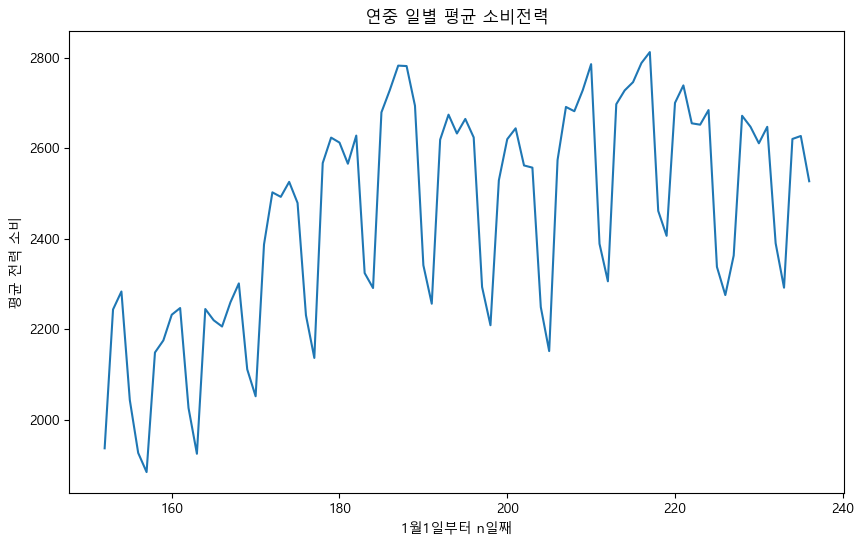

In [192]:
plt.figure(figsize=(10, 6))
# 연중 일별 평균 소비전력
sns.lineplot(x=mean_power_by_day_of_year.index, y=mean_power_by_day_of_year.values)
#plt.title('Mean Power Consumption by Day of the Year')
#plt.xlabel('Day of the Year')
#plt.ylabel('Mean Power Consumption')
plt.title('연중 일별 평균 소비전력')
plt.xlabel('1월1일부터 n일째')
plt.ylabel('평균 전력 소비')
plt.show()

C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


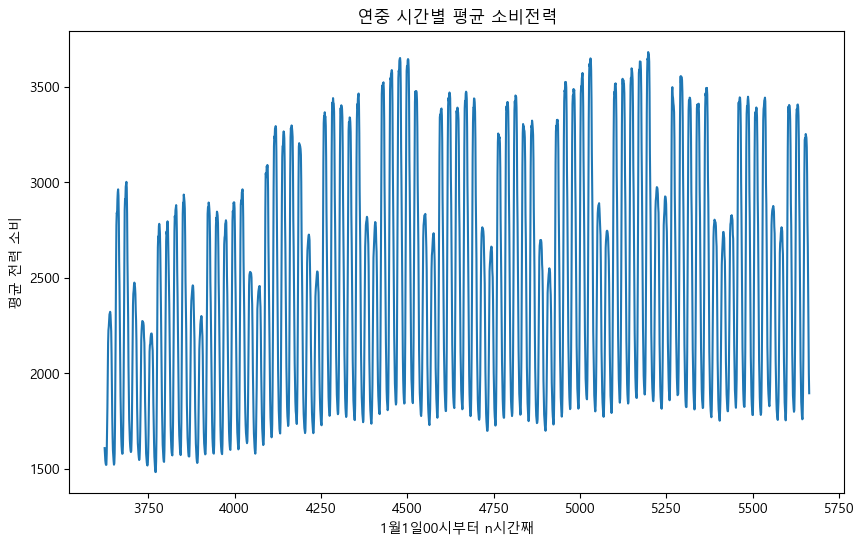

In [193]:
plt.figure(figsize=(10, 6))
# 연중 시간별 평균 소비전력
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
#plt.title('Mean Power Consumption by Hour of the Year')
#plt.xlabel('Hour of the Year')
#plt.ylabel('Mean Power Consumption')
plt.title('연중 시간별 평균 소비전력')
plt.xlabel('1월1일00시부터 n시간째')
plt.ylabel('평균 전력 소비')
plt.show()

C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

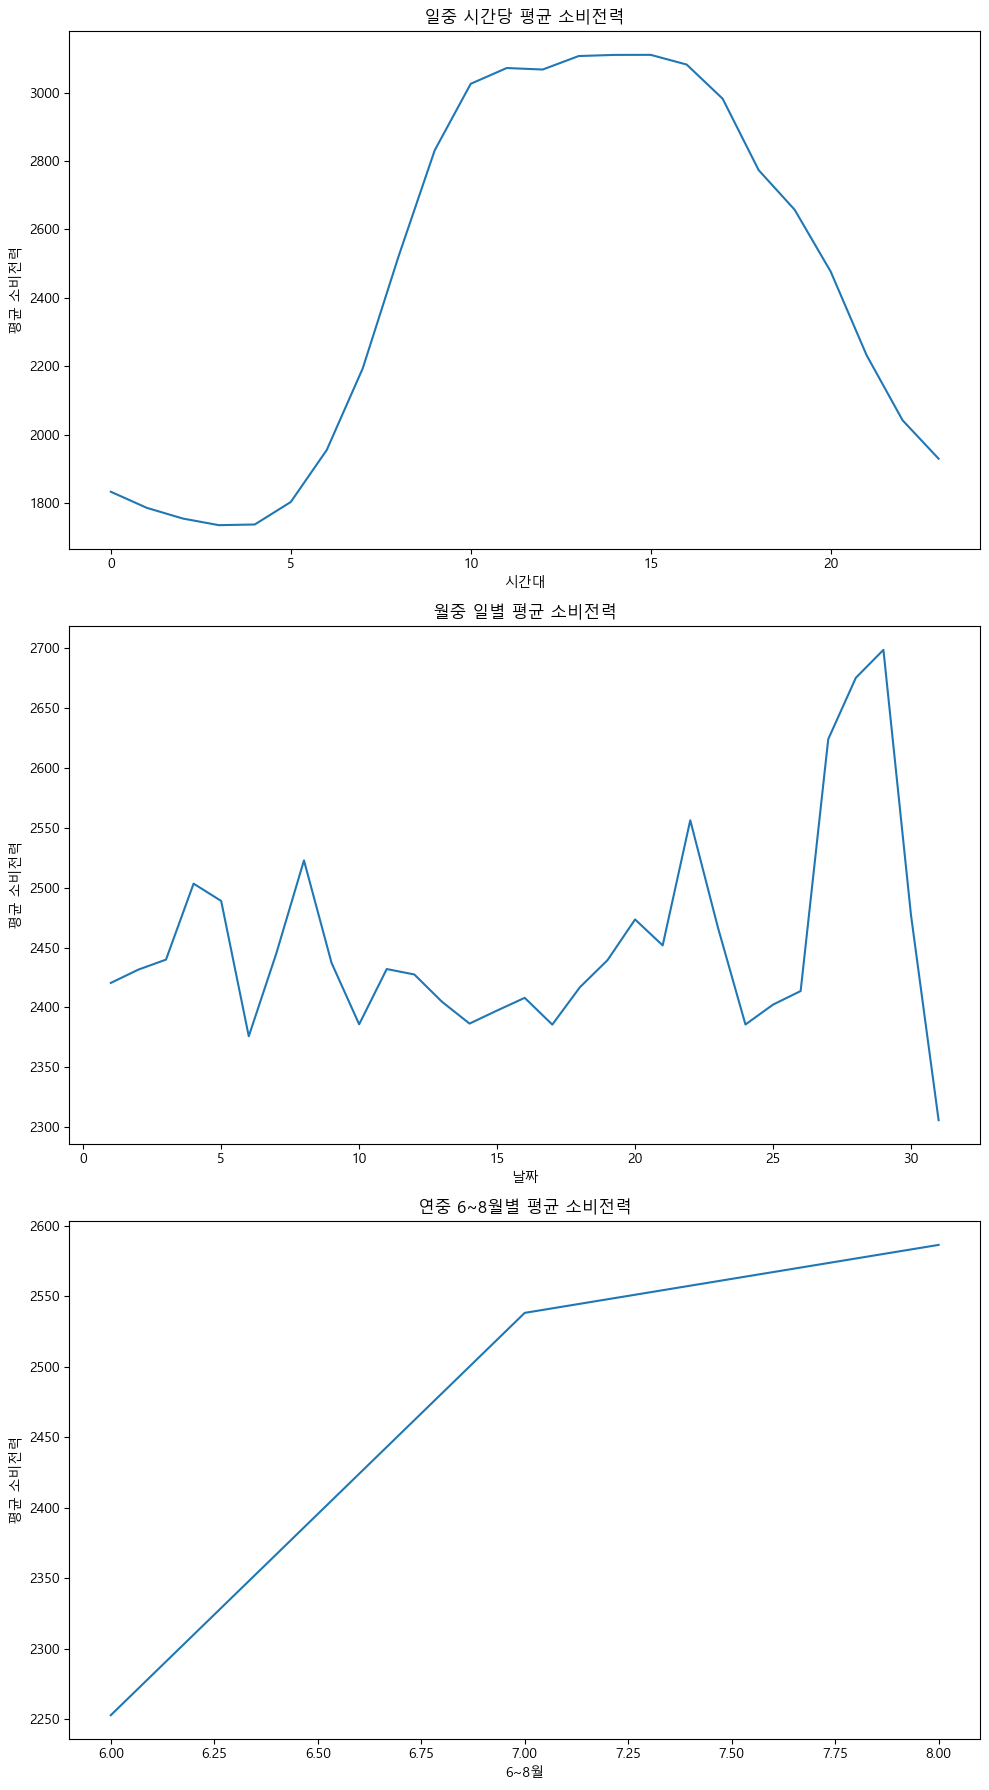

In [194]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot mean power consumption by hour of the day
# 시간당 평균 소비전력
# 6~8월 동안 같은 시간별 평균
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax=axs[0])
#axs[0].set_title('Mean Power Consumption by Hour of the Day')
#axs[0].set_xlabel('Hour of the Day')
#axs[0].set_ylabel('Mean Power Consumption')
axs[0].set_title('일중 시간당 평균 소비전력')
axs[0].set_xlabel('시간대')
axs[0].set_ylabel('평균 소비전력')

# Plot mean power consumption by day of the month
# 일별 평균 소비전력
# 6~8월 동안 같은날 평균
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values, ax=axs[1])
#axs[1].set_title('Mean Power Consumption by Day of the Month')
#axs[1].set_xlabel('Day of the Month')
#axs[1].set_ylabel('Mean Power Consumption')
axs[1].set_title('월중 일별 평균 소비전력')
axs[1].set_xlabel('날짜')
axs[1].set_ylabel('평균 소비전력')

# 월별 평균 소비전력
# 6월 평균, 7월 평균, 8월 평균
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[2])
#axs[2].set_title('Mean Power Consumption by Month of the Year')
#axs[2].set_xlabel('Month of the Year')
#axs[2].set_ylabel('Mean Power Consumption')
axs[2].set_title('연중 6~8월별 평균 소비전력')
axs[2].set_xlabel('6~8월')
axs[2].set_ylabel('평균 소비전력')

plt.tight_layout()
plt.show()

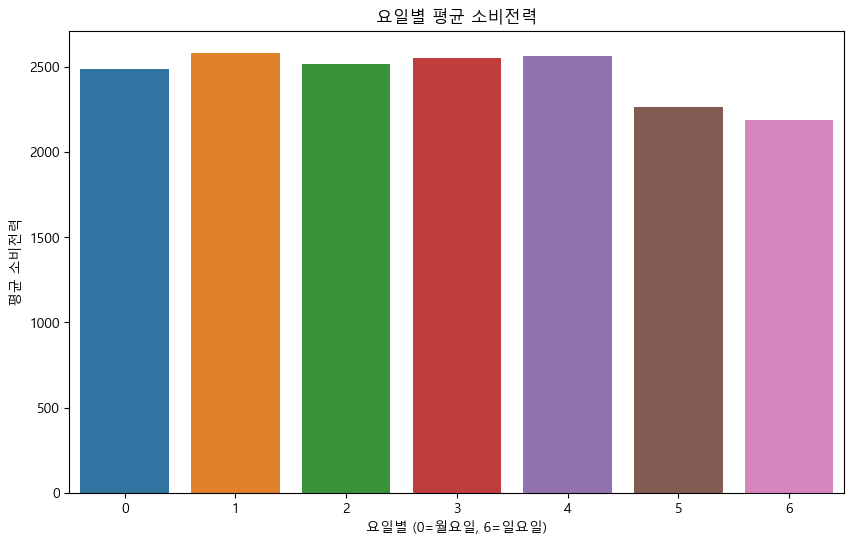

In [195]:
train_df['day_of_week'] = train_df['date_time'].dt.dayofweek

# 요일별 전력평균
mean_power_by_day_of_week = train_df.groupby('day_of_week')['power_consumption'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
#plt.title('Mean Power Consumption by Day of the Week')
#plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
#plt.ylabel('Mean Power Consumption')
plt.title('요일별 평균 소비전력')
plt.xlabel('요일별 (0=월요일, 6=일요일)')
plt.ylabel('평균 소비전력')
plt.show()

## 2.3 building type별 데이터 소비 전력 평균 분포 시각화

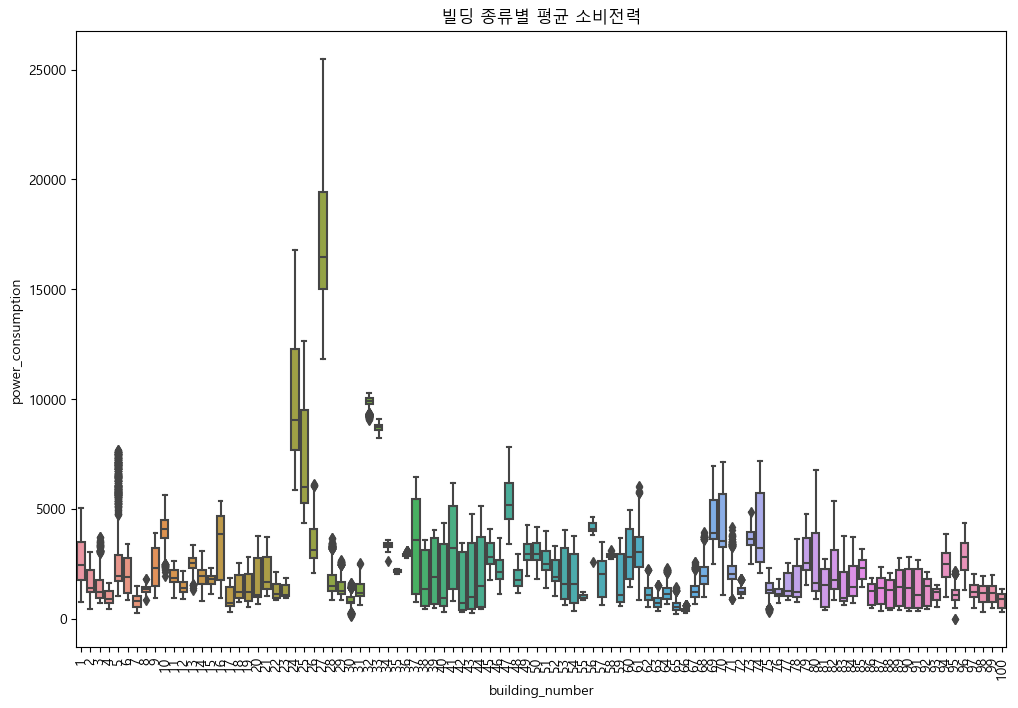

In [196]:
plt.figure(figsize=(12, 8))
#sns.boxplot(x='building_type', y='power_consumption', data=train_df)
sns.boxplot(x='building_number', y='power_consumption', data=train_df)
#plt.title('Power Consumption by Building Type')
plt.title('빌딩 종류별 평균 소비전력')
plt.xticks(rotation=90)
plt.show()

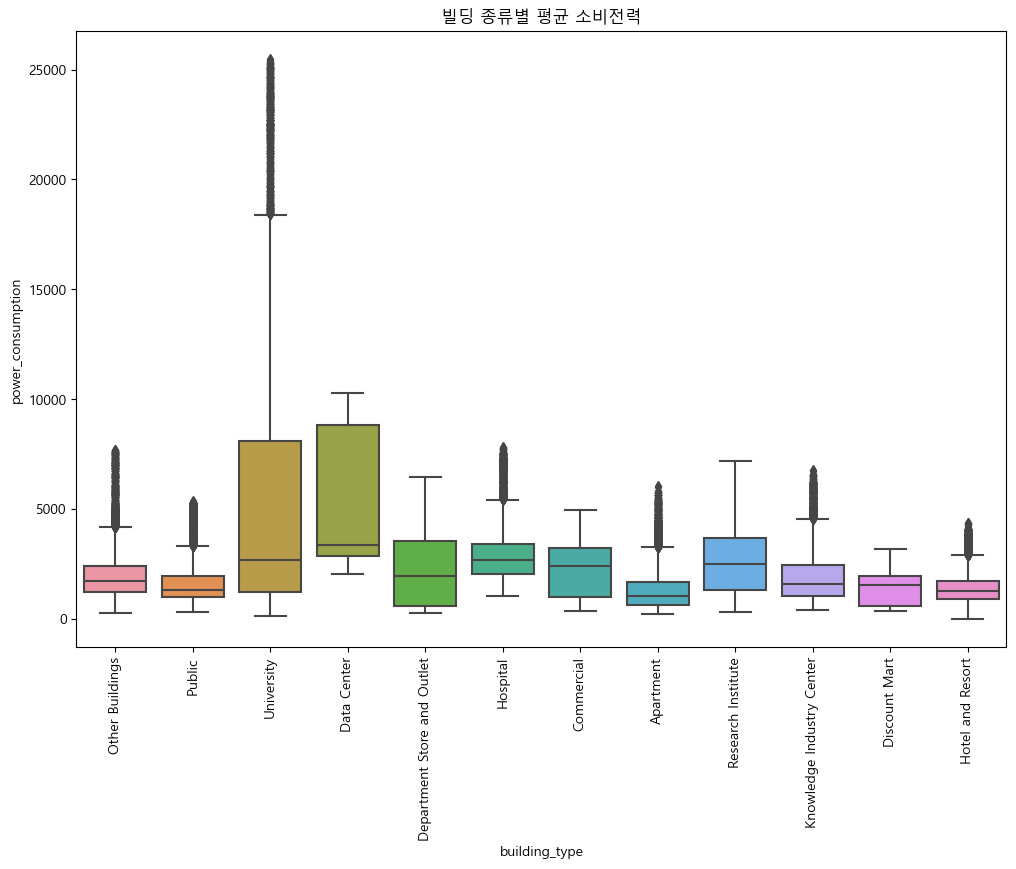

In [197]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='building_type', y='power_consumption', data=train_df)
#sns.boxplot(x='building_number', y='power_consumption', data=train_df)
#plt.title('Power Consumption by Building Type')
plt.title('빌딩 종류별 평균 소비전력')
plt.xticks(rotation=90)
plt.show()

In [198]:
building_info

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,Hotel and Resort,93314.00,60500.00,-,-,-
96,97,Hotel and Resort,55144.67,25880.00,-,-,-
97,98,Hotel and Resort,53578.62,17373.75,-,-,-
98,99,Hotel and Resort,53499.00,40636.00,-,-,-


#### 뻘짓
건물별로 묶어서 평균 시각화하려고 했는데, 이미 한거였음

In [199]:
# [확인용] 건물 종류별 평균 소비전력
tmp = train_df[0:2040]['power_consumption']
sum = 0
for i in tmp:
    sum += float(i)
print(sum/2040)

2653.0214117647083


In [200]:
# 건물 종류별 평균 소비전력
mean_power_by_type_of_building = train_df.groupby('building_number')['power_consumption'].mean()
mean_power_by_type_of_building

building_number
1      2653.021412
2      1677.016676
3      1444.078500
4       995.425985
5      2739.049588
          ...     
96     2808.038088
97     1235.922176
98     1136.114912
99     1159.884794
100     824.705176
Name: power_consumption, Length: 100, dtype: float64

In [201]:
mean_power_by_type_of_building.info()

<class 'pandas.core.series.Series'>
Index: 100 entries, 1 to 100
Series name: power_consumption
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [202]:
mean_power_by_type_of_building.head()

building_number
1    2653.021412
2    1677.016676
3    1444.078500
4     995.425985
5    2739.049588
Name: power_consumption, dtype: float64

In [203]:
type(mean_power_by_hour)

pandas.core.series.Series

In [204]:
mean_power_by_hour.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='hour')

In [205]:
mean_power_by_hour.values

array([1832.90981235, 1785.85380176, 1754.57376588, 1735.19383902,
       1737.14263529, 1802.90279216, 1955.08286412, 2193.82901   ,
       2523.01214647, 2831.77535471, 3026.15306588, 3072.31917529,
       3067.94545412, 3107.38891471, 3110.70962294, 3110.86227765,
       3082.49778059, 2982.48858294, 2773.69378353, 2657.82182176,
       2477.18184588, 2232.16067235, 2041.8316951 , 1929.54437235])

In [206]:
type(mean_power_by_type_of_building)

pandas.core.series.Series

In [207]:
mean_power_by_type_of_building.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100],
      dtype='int64', name='building_number')

In [208]:
mean_power_by_type_of_building.values

array([ 2653.02141176,  1677.01667647,  1444.0785    ,   995.42598529,
        2739.04958824,  1973.00470588,   773.16      ,  1327.46305882,
        2339.58258824,  4058.18694118,  1930.55623529,  1441.78711765,
        2534.98835294,  1909.02564706,  1779.53382353,  3405.128     ,
         977.50239706,  1453.70419118,  1423.60741667,  1722.78752941,
        1989.10449918,  1235.64317647,  1264.35044118, 10043.46970588,
        7264.32358824,  3529.79011765, 17453.64215686,  1730.84117647,
        1450.08242647,   841.57036765,  1355.3685    ,  9865.78358824,
        8700.81105882,  3352.70664706,  2172.36529412,  2892.82182353,
        3352.27191176,  1812.13358824,  2170.46635294,  1888.74367647,
        3272.22397059,  1595.57823529,  1893.26985294,  2126.28682353,
        2953.83364706,  2251.19258824,  5375.09      ,  1884.14417647,
        3055.167     ,  3030.02      ,  2643.13014706,  2109.74308824,
        2003.82670588,  1824.23038235,  1009.08658824,  4169.32605882,
      

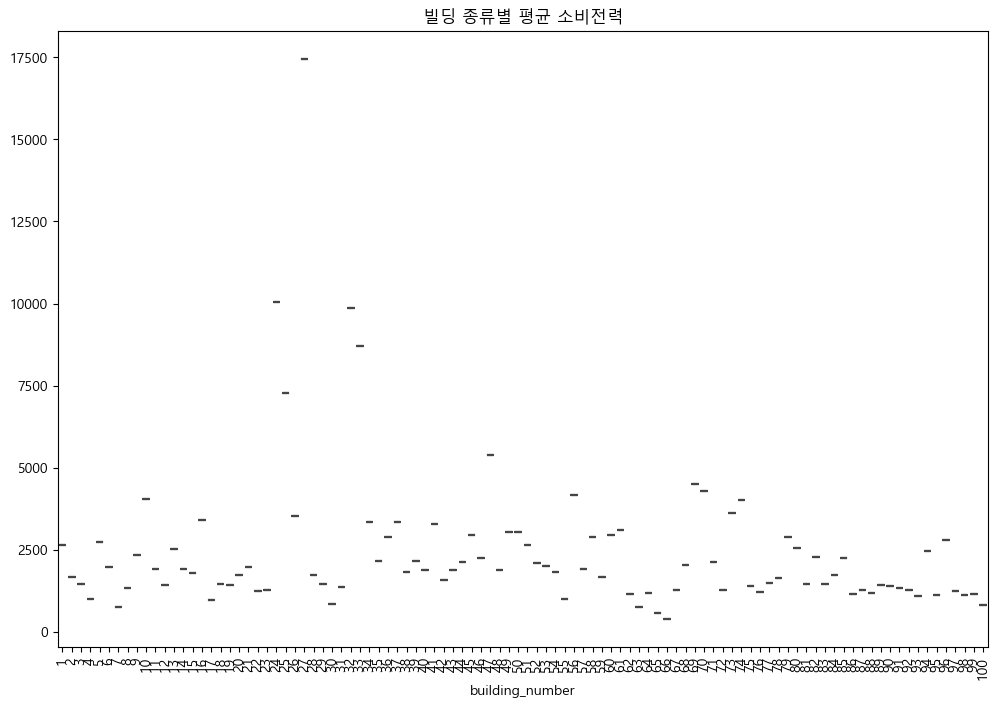

In [209]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=mean_power_by_type_of_building.index, 
            y=mean_power_by_type_of_building.values)
#plt.title('Power Consumption by Building Type')
plt.title('빌딩 종류별 평균 소비전력')
plt.xticks(rotation=90)
#plt.xticks(rotation=10)
plt.show()

### hour of the day
- datacenter의 경우 요일 평균과, 시간 평균 모두 일정한 모습을 보여주네요.
- 또한 data center와 university에서 아주 많은 양의 전력을 소모하네요.
- 대부분 낮시간에 전력을 많이 소모하지만 datacenter와 Apartment는 다른 양상을 띄네요.
- 또한 주말에는 전력 소비가 대체로 낮아지지만 상가나 아파트는 오히려 증가하는 모습을 보이네요.

In [210]:
building_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   building_number       100 non-null    int64  
 1   building_type         100 non-null    object 
 2   total_area            100 non-null    float64
 3   cooling_area          100 non-null    float64
 4   solar_power_capacity  100 non-null    object 
 5   ess_capacity          100 non-null    object 
 6   pcs_capacity          100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [211]:
mean_power_by_hour_building = train_df.groupby(['hour', 'building_type'])['power_consumption'].mean().reset_index()
#mean_power_by_hour_building = train_df.groupby(['hour', 'building_number'])['power_consumption'].mean().reset_index()

C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


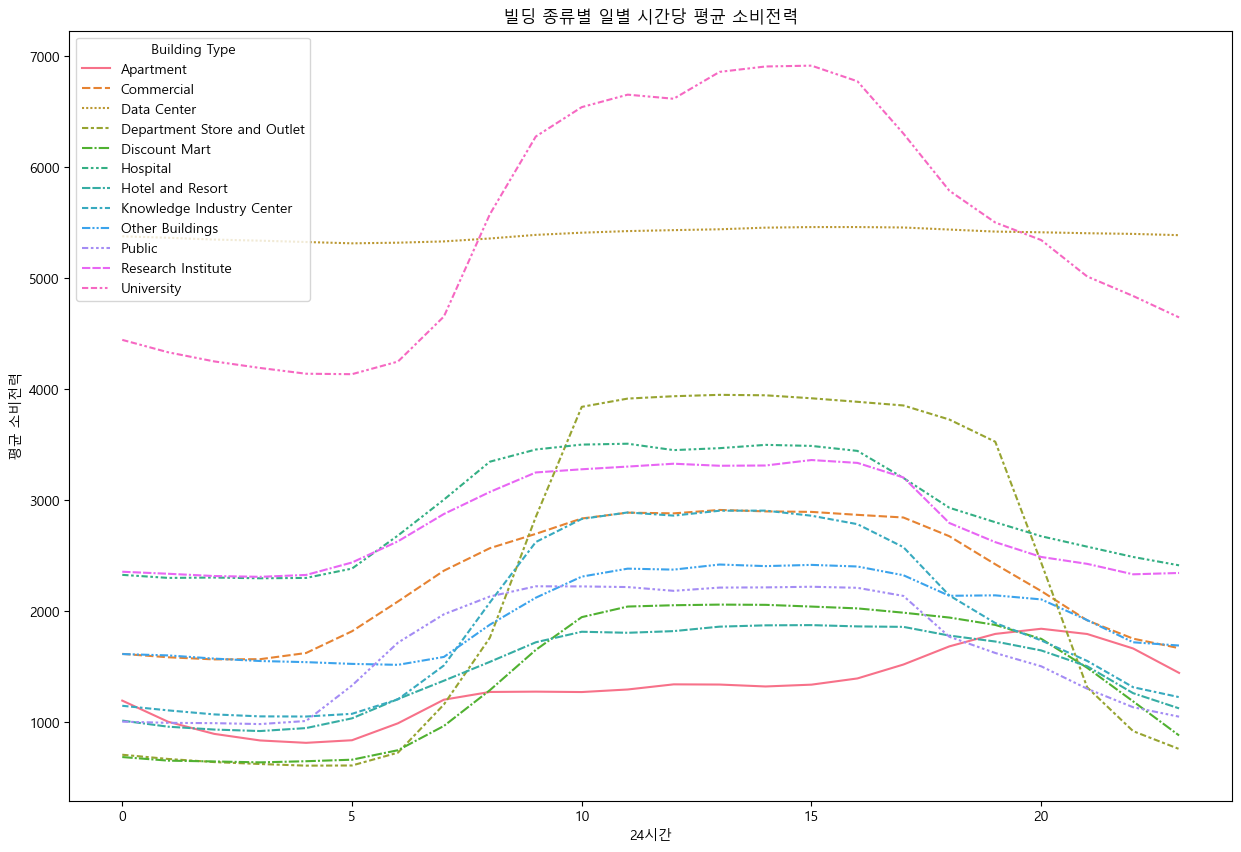

In [212]:
pivot_df = mean_power_by_hour_building.pivot(index='hour', columns='building_type', values='power_consumption')
#pivot_df = mean_power_by_hour_building.pivot(index='hour', columns='building_number', values='power_consumption')

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df)
#plt.title('Mean Power Consumption by Hour of Day and Building Type')
#plt.xlabel('Hour of Day')
#plt.ylabel('Mean Power Consumption')
#plt.legend(title='Building Type')
plt.title('빌딩 종류별 일별 시간당 평균 소비전력')
plt.xlabel('24시간')
plt.ylabel('평균 소비전력')
plt.legend(title='Building Type')
plt.show()

C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


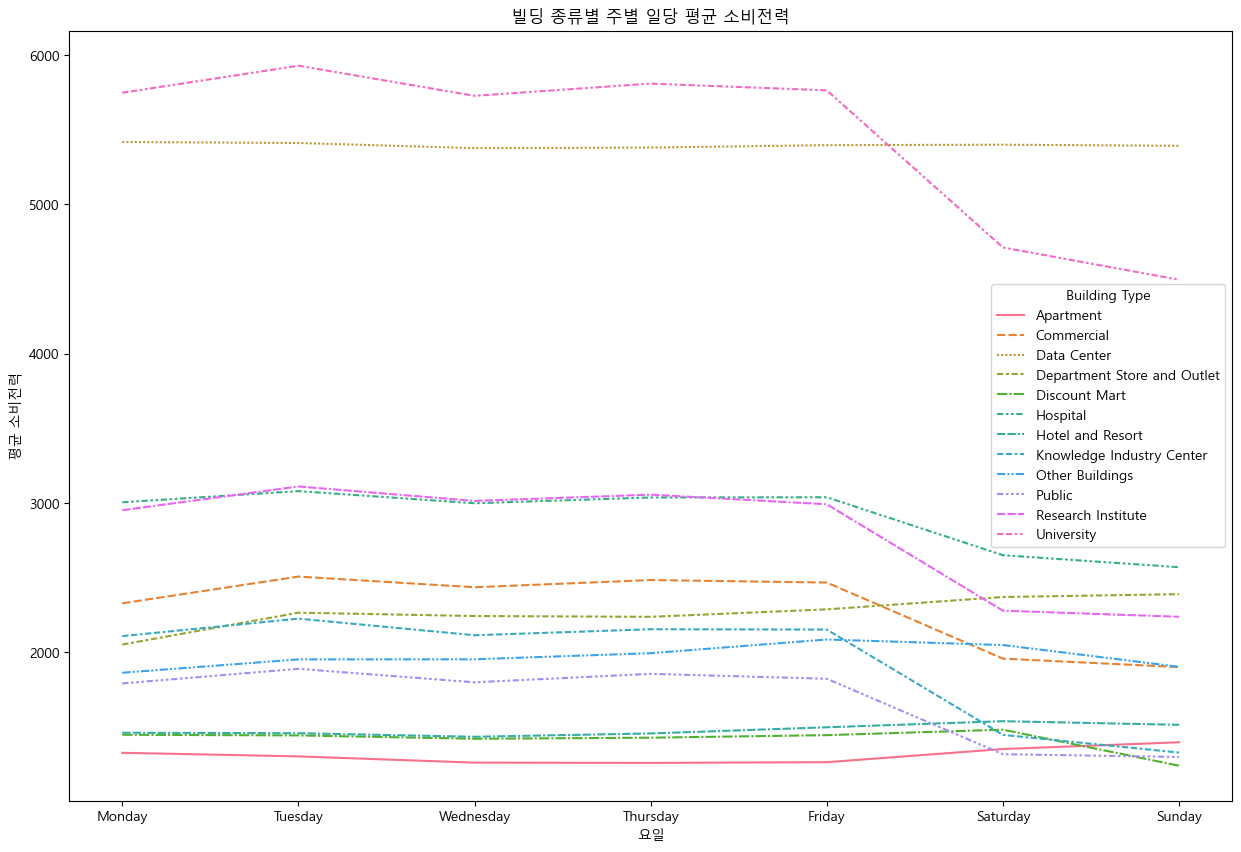

In [213]:
mean_power_by_day_building = train_df.groupby(['day_of_week', 'building_type'])['power_consumption'].mean().reset_index()

pivot_df_day = mean_power_by_day_building.pivot(index='day_of_week', columns='building_type', values='power_consumption')

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df_day.index = day_names

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df_day)
#plt.title('Mean Power Consumption by Day of Week and Building Type')
#plt.xlabel('Day of Week')
#plt.ylabel('Mean Power Consumption')
plt.title('빌딩 종류별 주별 일당 평균 소비전력')
plt.xlabel('요일')
plt.ylabel('평균 소비전력')
plt.legend(title='Building Type')
plt.show()